* 1) If you had to identify the 5 best ad groups, which ones would be? Which metric did you choose to identify the best ones? Why? Explain the pros of your metric as well as the possible cons. From a business perspective, choosing that metric implies that you are focusing on what?
* 2) For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).
* 3) Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.


- date : all data are aggregated by date
- shown : the number of ads shown on a given day all over the web. Impressions are free. That is, companies pay only if a user clicks on the ad, not to show it
- clicked : the number of clicks on the ads. This is what companies pay for. By clicking on the ad, the user is brought to the site
- converted : the number of conversions on the site coming from ads. To be counted, a conversion as to happen on the same day as the ad click.
- avg_cost_per_click : on an average, how much it cost each of those clicks
- total_revenue : how much revenue came from the conversions
- ad : we have several different ad versions with different text. This shows which ad group we are considering

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read the file
data = pandas.read_csv("Ad_data.csv")
print(data.shape)


(2115, 7)


## Question 1
If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

In [2]:
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [5]:
data['date'] = pandas.to_datetime(data['date'])
data.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


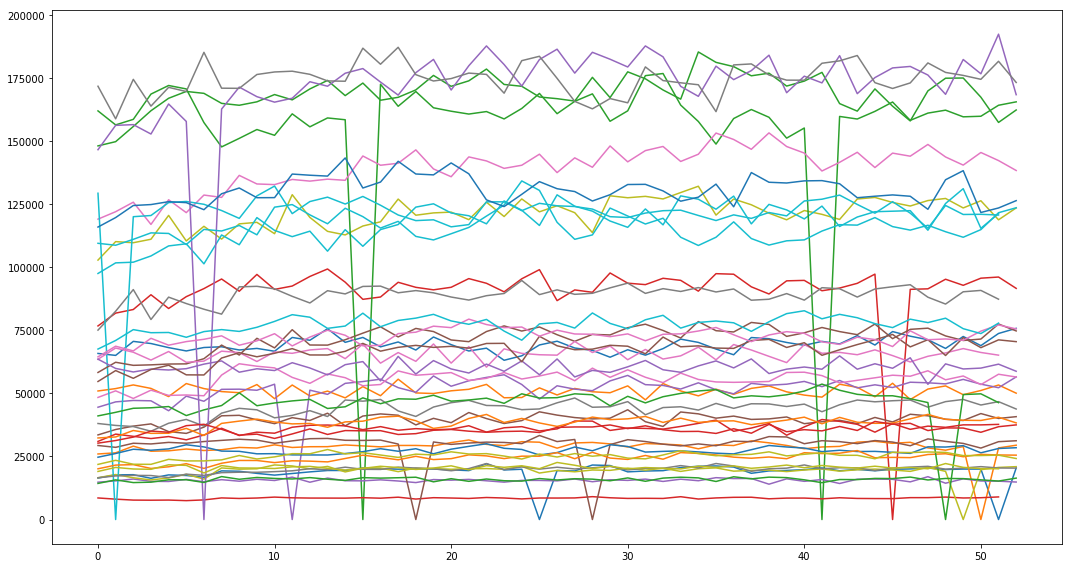

In [16]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = data[data['ad'] == ad_group].sort_values(by='date')['shown'].values
    ax.plot(vals, label=ad_group)
# ax.legend()
plt.tight_layout()
plt.show()

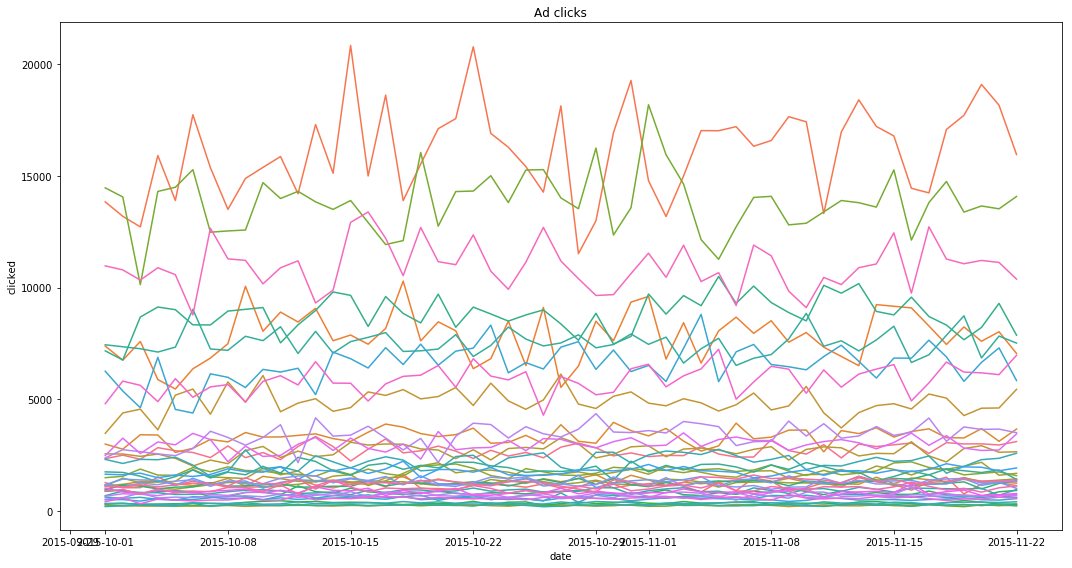

In [23]:
#remove zero impression data
data = data.query('shown>0')
data = data.query('clicked>0')
fig, ax = plt.subplots(figsize=(15, 8))
#now check clicks
ax=sns.lineplot(x="date", y="clicked",hue="ad", data=data, legend="")
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Ad clicks") 
plt.show()

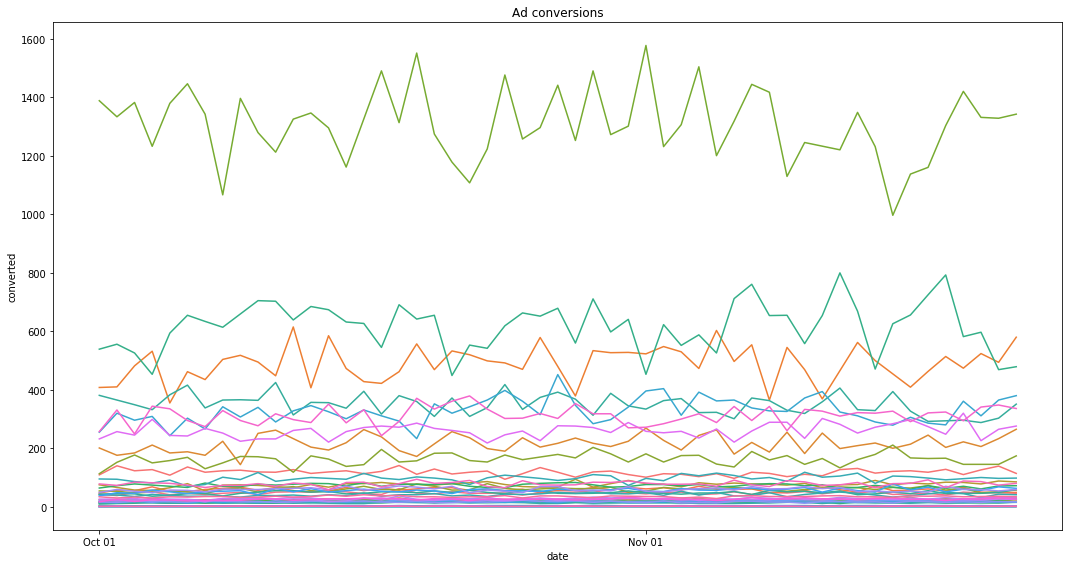

In [24]:
#remove zero click data
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.lineplot(x="date", y="converted",hue="ad", data=data, legend="")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Ad conversions") 
plt.show()


In [25]:
print(data.describe())

               shown       clicked    converted  avg_cost_per_click  total_revenue        Profit
count    2091.000000   2091.000000  2091.000000         2091.000000    2091.000000   2091.000000
mean    68853.852702   3088.744142   127.822573            1.387661    1989.242257  -3741.709383
std     48799.535713   3792.468317   234.394500            0.746035    3958.838731   7669.956335
min      7494.000000    187.000000     0.000000            0.080000       0.000000 -66160.260000
25%     28446.000000    756.500000    18.000000            0.780000     244.765000  -4031.885000
50%     54569.000000   1413.000000    42.000000            1.410000     561.070000  -1298.680000
75%    100395.500000   3413.500000   106.000000            1.920000    1634.895000   -135.960000
max    192507.000000  20848.000000  1578.000000            4.190000   39623.710000  16067.220000


In [27]:
#Revenue cannot be negative
#There are 4 events with negative revenue

print("There are", len(data.query('total_revenue<0')), "events with negative revenue")

#Remove those
data = data.query('total_revenue>=0')
#Also, clicked should be <= shown and converted should be <= clicked. Let's see:
print("There are", len(data.query('shown<clicked | clicked<converted')), "events where the funnel doesn't make any sense")
# There are 0 events where the funnel doesn't make any sense
data['Profit'] = data['total_revenue'] - data['avg_cost_per_click']*data['clicked']
data.head()
def unit_profit(df):
    '''function to calculate unit profit'''
    profit = df['Profit'].sum()
    shown = df['shown'].sum()
    val = profit/shown
    return val

grouped = data.groupby('ad').apply(unit_profit).reset_index()
grouped = grouped.rename(columns = {0:'unit_profit'})
grouped = grouped.sort_values(by = 'unit_profit',ascending = False)
grouped.head(10)

There are 0 events with negative revenue
There are 0 events where the funnel doesn't make any sense


,ad,unit_profit
7,ad_group_16,0.020516
11,ad_group_2,0.020116
5,ad_group_14,0.016485
24,ad_group_31,0.005824
19,ad_group_27,0.000809
39,ad_group_9,-0.000069
29,ad_group_36,-0.000560
8,ad_group_17,-0.002144
6,ad_group_15,-0.002293
17,ad_group_25,-0.002576


Based on above calculation, we can see the the top 5 best ad groups are: ad_group_16, ad_group_2, ad_group_14, ad_group_31, ad_group_27.

## Question 2
For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


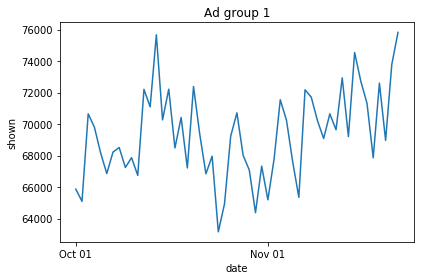

In [28]:
import fbprophet
#Let's firstly take just one ad_group and do it manually for that one as an example. Then, we will apply it to all others
data_ad1 = data.query('ad==\"ad_group_1\"')[["date", "shown"]]
#plot
g=sns.lineplot(x="date", y="shown", data=data_ad1)
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.set_title("Ad group 1") 
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


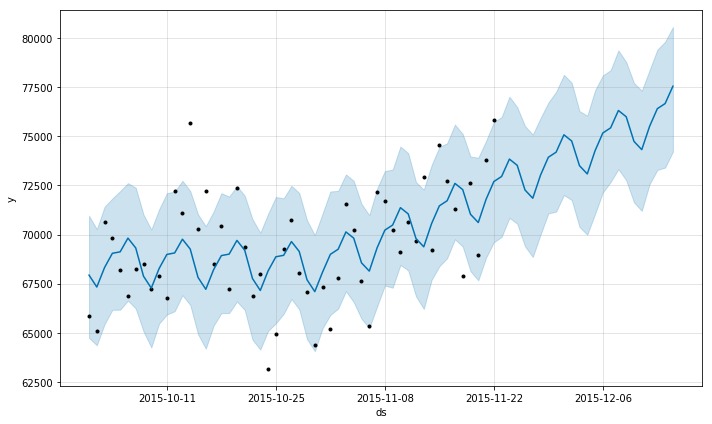

In [30]:
#Let's build time series using prophet. From previous plots, time series appear pretty straightforward and flattish. Default values should do fine
  
#change column names and index
data_ad1['ds'] = data_ad1['date']
data_ad1.rename({'shown': 'y'}, axis=1, inplace=True)
data_ad1.set_index('date', inplace=True)

#build the model
ts = fbprophet.Prophet()
ts.fit(data_ad1)
  
#make predictions until Dec 15. This is the number of days for which we need a prediction to get to Dec 15
 
days_predictions = (pandas.to_datetime("2015-12-15")-data_ad1['ds'].max()).days
future_data = ts.make_future_dataframe(periods = days_predictions)
predictions = ts.predict(future_data)
  
#let's plot them
ts.plot(predictions)
plt.show()

In [35]:
predictions
predictions['yhat'].iat[-1]

77558.45228548608

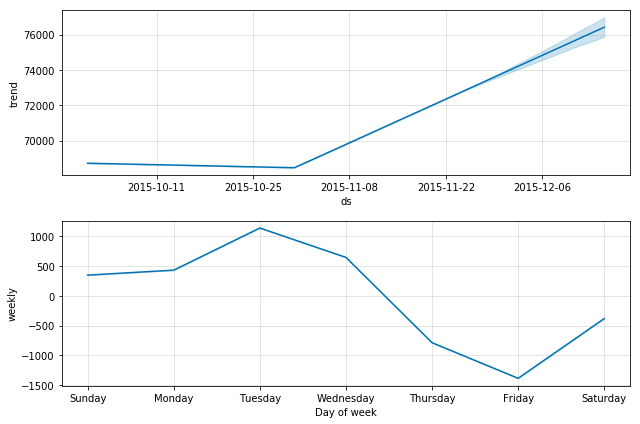

In [31]:
#and plot the series component
ts.plot_components(predictions)
plt.show()

In [37]:
#data set to store results
predictions_all_groups = pandas.DataFrame({'ad_group':data['ad'].unique(),
                                           'date': pandas.to_datetime("2015-12-15")})
prediction_dec_15 = [] 

#We will do it via a for loop through all the ad groups
for level in predictions_all_groups.ad_group:
    tmp = data.loc[data['ad']==level][["date", "shown"]]
    tmp['ds'] = tmp['date']
    tmp.rename({'shown': 'y'}, axis=1, inplace=True)
    tmp.set_index('date', inplace=True)
     
    #build the model
    ts_tmp = fbprophet.Prophet()
    ts_tmp.fit(tmp)
     
    #make predictions until Dec 15. This is the number of days for which we need a prediction to get to Dec 15
    days_predictions_tmp = (pandas.to_datetime("2015-12-15")-tmp['ds'].max()).days
    future_data_tmp = ts_tmp.make_future_dataframe(periods = days_predictions_tmp)
    predictions_tmp = ts_tmp.predict(future_data_tmp)
     
    #store results for the last day, i.e. Dec 15 prediction
    prediction_dec_15.append(round(predictions_tmp['yhat'].iat[-1]))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [38]:
predictions_all_groups['predictions'] = prediction_dec_15

In [39]:
predictions_all_groups

,ad_group,date,predictions
0,ad_group_1,2015-12-15,77558.0
1,ad_group_2,2015-12-15,50305.0
2,ad_group_3,2015-12-15,152888.0
3,ad_group_4,2015-12-15,94679.0
4,ad_group_5,2015-12-15,54750.0
5,ad_group_6,2015-12-15,40587.0
6,ad_group_7,2015-12-15,56988.0
7,ad_group_8,2015-12-15,47171.0
8,ad_group_9,2015-12-15,124642.0
9,ad_group_10,2015-12-15,127043.0


## Question 3
Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down

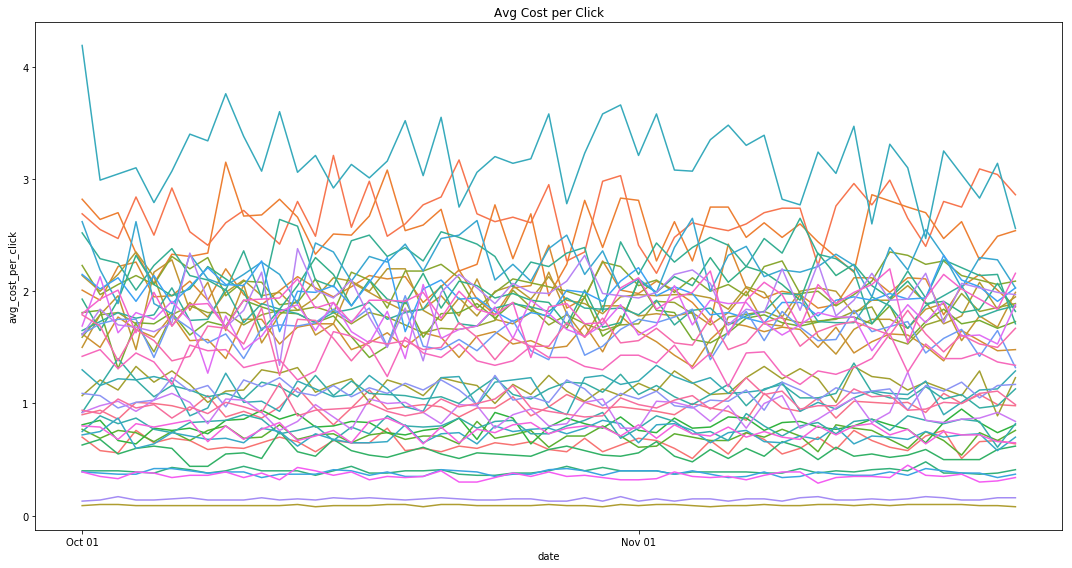

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.lineplot(x="date", y="avg_cost_per_click",hue="ad", data=data, legend="")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Avg Cost per Click") 
plt.show()


In [43]:
# def cost_stats(df):
#     """ function to calculate the avg_cost_per_click trend """
#     tmp = df.sort_values(by='date')['avg_cost_per_click'].values
#     ratio = tmp[1:] / tmp[:-1]
    
# #     ratio_mean = np.mean(ratio)
# #     ratio_min = np.min(ratio)
# #     ratio_25 = np.percentile(ratio, 25)
# #     ratio_50 = np.percentile(ratio, 50)
# #     ratio_75 = np.percentile(ratio, 75)
# #     ratio_max = np.max(ratio)
    
#     return pandas.Series([ratio_mean, ratio_min, ratio_25, ratio_50, ratio_75, ratio_max], 
#                      index=['mean', 'min', '25%', '50%', '75%', 'max'])

# stats = data.groupby('ad').apply(cost_stats)
# stats.head()

# a = data.sort_values(by='date')['avg_cost_per_click'].values

,mean,min,25%,50%,75%,max
ad,,,,,,
ad_group_1,1.007436,0.822430,0.930747,0.989999,1.094223,1.282353
ad_group_10,1.011576,0.689922,0.920666,0.976923,1.105323,1.382022
ad_group_11,1.007269,0.788889,0.963797,1.008528,1.038846,1.246479
ad_group_12,1.002026,0.852174,0.948578,0.997608,1.051528,1.198895
ad_group_13,1.005483,0.715847,0.960051,1.000015,1.067458,1.312977


In [74]:
def cost_stats(df):
    """ function to calculate the avg_cost_per_click trend """
    tmp = df.sort_values(by='date')['avg_cost_per_click'].values
    ratio = tmp[1:] / tmp[:-1]
    
    ratio_mean = np.mean(ratio)
    ratio_min = np.min(ratio)
    ratio_25 = np.percentile(ratio, 25)
    ratio_50 = np.percentile(ratio, 50)
    ratio_75 = np.percentile(ratio, 75)
    ratio_max = np.max(ratio)
    
    return pandas.Series([ratio_mean, ratio_min, ratio_25, ratio_50, ratio_75, ratio_max], 
                     index=['mean', 'min', '25%', '50%', '75%', 'max'])

stats = data.groupby('ad').apply(cost_stats)
stats.head()

,mean,min,25%,50%,75%,max
ad,,,,,,
ad_group_1,1.007436,0.822430,0.930747,0.989999,1.094223,1.282353
ad_group_10,1.011576,0.689922,0.920666,0.976923,1.105323,1.382022
ad_group_11,1.007269,0.788889,0.963797,1.008528,1.038846,1.246479
ad_group_12,1.002026,0.852174,0.948578,0.997608,1.051528,1.198895
ad_group_13,1.005483,0.715847,0.960051,1.000015,1.067458,1.312977


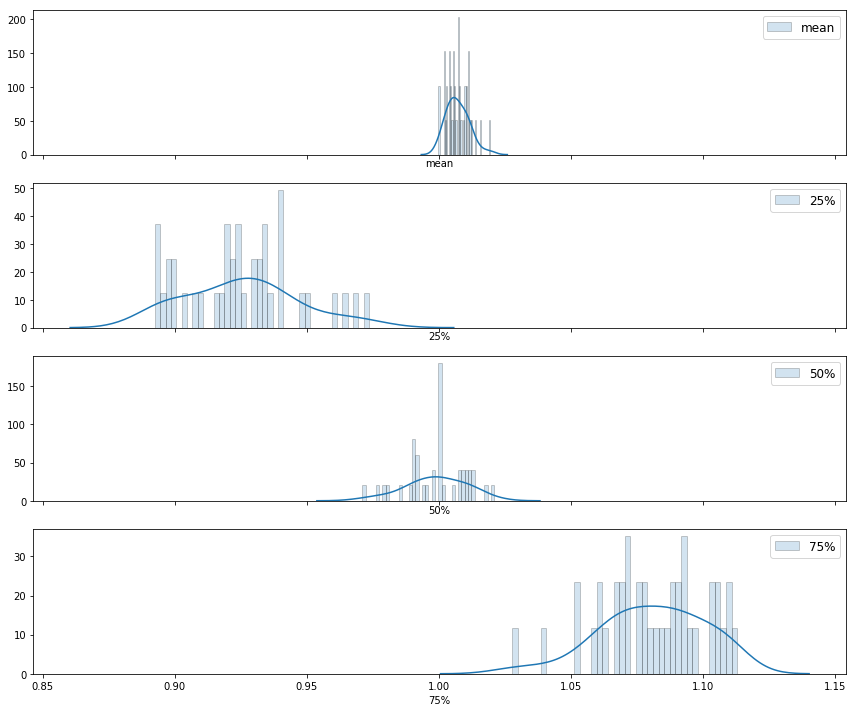

In [79]:
# visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

sns.distplot(stats['mean'],bins=40, ax=ax[0], label='mean', hist_kws=hist_kws)
ax[0].legend(fontsize=12)

sns.distplot(stats['25%'], bins=40, ax=ax[1], label='25%', hist_kws=hist_kws)
ax[1].legend(fontsize=12)

sns.distplot(stats['50%'], bins=40, ax=ax[2], label='50%', hist_kws=hist_kws)
ax[2].legend(fontsize=12)

sns.distplot(stats['75%'], bins=40, ax=ax[3], label='75%', hist_kws=hist_kws)
ax[3].legend(fontsize=12)

plt.tight_layout()
plt.show()

Based on above analysis, we can manually set a series cutoff thresholds to identify the cluster of going up, flat, and going down.
or we can instead doing a liear regresion and select base on coefficient.

In [85]:
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,Profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,-1816.55


In [88]:
import statsmodels.api as sm
#build all linear regressions via a for loop

#empty vectors
coefficient = []
p_value = []

#for loop over all ad groups
for level in data['ad'].unique():
  
  #subset dataset and keep variables we care about
    data_reg = data.loc[data['ad']==level][["date", "avg_cost_per_click"]]
    data_reg = data_reg.loc[data.date.dt.month == 11]
  #replace dates with numbers. 0 is the minimum date, 1 is minimum date + 1 day and so on
    data_reg['date'] = (data_reg['date'] - data_reg['date'].min()).dt.days
  #add intercept
    data_reg['intercept'] = 1
  
  #build the regression
    lr = sm.OLS(data_reg['avg_cost_per_click'],data_reg.drop('avg_cost_per_click', axis=1)).fit()
  #save coefficient and p-value
    coefficient.append(lr.params[0])
    p_value.append(lr.pvalues[0])


#put all together in a datframe
lr_output = pandas.DataFrame({
                  'ad_group': data['ad'].unique(),
                  'coefficients': coefficient,
                  'p_value': p_value})

#classify based on the rule described above. we use Bonferroni rule for significance
lr_output['cluster'] = np.where((lr_output['coefficients']>0) & (lr_output['p_value']<0.05), 'going_up',
                                np.where((lr_output['coefficients']<0) & (lr_output['p_value']<0.05), 'going_down',
                                         'flat'))
print(lr_output)    

       ad_group  coefficients   p_value     cluster
0    ad_group_1      0.004269  0.052287        flat
1    ad_group_2      0.001095  0.671164        flat
2    ad_group_3      0.024794  0.000852    going_up
3    ad_group_4     -0.002004  0.771373        flat
4    ad_group_5      0.000102  0.984262        flat
5    ad_group_6     -0.002603  0.485300        flat
6    ad_group_7     -0.001299  0.784204        flat
7    ad_group_8     -0.003552  0.300906        flat
8    ad_group_9      0.000011  0.960738        flat
9   ad_group_10     -0.002928  0.469131        flat
10  ad_group_11      0.001844  0.719676        flat
11  ad_group_12      0.006712  0.151204        flat
12  ad_group_13     -0.003349  0.427513        flat
13  ad_group_14      0.001123  0.670579        flat
14  ad_group_15      0.000209  0.923289        flat
15  ad_group_16     -0.001050  0.574473        flat
16  ad_group_17      0.000559  0.495011        flat
17  ad_group_18     -0.012372  0.010676  going_down
18  ad_group

Looks like everything is flat. W/o using the Bonferroni correction (i.e. had we chosen a less aggressive p-value threshold), we would have likely found some significant ads.
Also, via a linear regression, we are looking at the overall trend. That is, old data points weigh just as much as the most recent ones. Had we focused only on the most recent data, we obviously might have found different results.
